### Final Project

**HeonYeong(Andy) Lee**

**Professor Jacob Koehler**

**Data Bootcamp ECON-UB 232**

**December 21, 2023**

***Dataset Overview:***
For my final project, I will be using the "Self Harm and Substance Abuse Deaths Worldwide" dataset from kaggle.com
The link to the dataset: https://www.kaggle.com/datasets/thomaseltonau/self-harm-and-substance-abuse-deaths-worldwide/
This dataset is a comprehensive collection of global data focusing on mortality due to self-harm and substance abuse.
In terms of reliability, I believe this dataset is a very reliable one as it is sourced from the World Health Organisation Mortality Database (2023).
The data includes a range of variables such as year, cause of death (categorized as self-harm or substance abuse), age range, ISO country codes, gender, total deaths, and population figures for each age and sex group. Moreover, the dataset itself spans multiple years and covers a wide array of countries which accomplishes in offering a detailed view of this global health issue.

***Objective:***
The main reason why I picked this dataset is because I want to investigate the global patterns and trends self-harm and substance abuse deaths. 
By further analyzing this dataset I chose, my goal is to uncover significant trends across different demographics and geographic regions.
I believe that this analysis will help me identify high-risk groups and understand how these patterns have evolved over time.

***Relevance:***
This particular issue is something that can't be overstated. Self-harm and substance abuse deaths are critical public health concerns that carry profound implications on individuals, families, and communities globally. Mental health issues and various socio-economic factos being two of the most common indicators of these behaviors, these issues need to be understood thoroughly as it can lead to better-informed public health policies, targeted interventions, and resource allocations. This final projects aims to provide valuable insights that can aid mental health organizations, public health authorities, and policymakers in coming up with strategies to combat these issues effectively. In addition, I also hope to raise awareness about the magnitude of these problems as this will serve as a vital step in destigmatizing mental health issues and encouraging individuals to seek help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd


**Step 1**: Loading the data file.

Below, I am loading in the data from the `world_wide_self_harm_and_substance_deaths.csv` file and assigning it to the variable `selfharmsubstancedataset` below.  

In [2]:
selfharmsubstancedataset = pd.read_csv('data/world_wide_self_harm_and_substance_deaths.csv')

In [3]:
selfharmsubstancedataset.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


Let's see some basic information about `selfharmsubstancedataset` by using `.info()` method.  

In [4]:
selfharmsubstancedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48631 entries, 0 to 48630
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    48631 non-null  int64  
 1   Cause                   48631 non-null  object 
 2   Age_Range               48631 non-null  object 
 3   ISO_Code                48631 non-null  object 
 4   Sex                     48631 non-null  object 
 5   Deaths                  48631 non-null  int64  
 6   Age_and_Sex_Population  28987 non-null  float64
 7   Country                 48631 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.0+ MB


By using `.info()` method on `selfharmsubstancedataset`, we are given the number of columns which is 8 and the number of rows which is 48631. 

**BUT!** before we proceed, let's check if this dataset requires cleaning by checking for duplicates and missing values.

In [5]:
# If 0, then no duplicates.
selfharmsubstancedataset.duplicated().sum()

0

In [6]:
# If all 0, then no missing values.
selfharmsubstancedataset.isna().sum()

Year                          0
Cause                         0
Age_Range                     0
ISO_Code                      0
Sex                           0
Deaths                        0
Age_and_Sex_Population    19644
Country                       0
dtype: int64

For the "Age_and_Sex_Population" column, we can see that we are missing 19644 values. We can't ignore this so we need to figure out a way
to handle all these missing values. I am going to go with the imputation method, specifically median imputation. So, let's do that.

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [8]:
# Using imputer to the 'Age_and_Sex_Population' column
selfharmsubstancedataset["Age_and_Sex_Population"] = imputer.fit_transform(selfharmsubstancedataset[["Age_and_Sex_Population"]])

In [9]:
# Let's check if there are any missing values left
missing_values_after_imputation = selfharmsubstancedataset.isna().sum()
print(missing_values_after_imputation)

Year                      0
Cause                     0
Age_Range                 0
ISO_Code                  0
Sex                       0
Deaths                    0
Age_and_Sex_Population    0
Country                   0
dtype: int64


Now that we have confirmed that we do not have any missing values. We can proceed with the exploratory data analysis.

#### _Exploratory Data Analysis:_

**Trend over time**: For the first visualization, let's explore any increasing or decreasing trends over the years by creating a line graph
that shows the total number of self-harm and substance abuse deaths worldwide per year.

In [10]:
yearly_deaths = selfharmsubstancedataset.groupby("Year")["Deaths"].sum().reset_index()

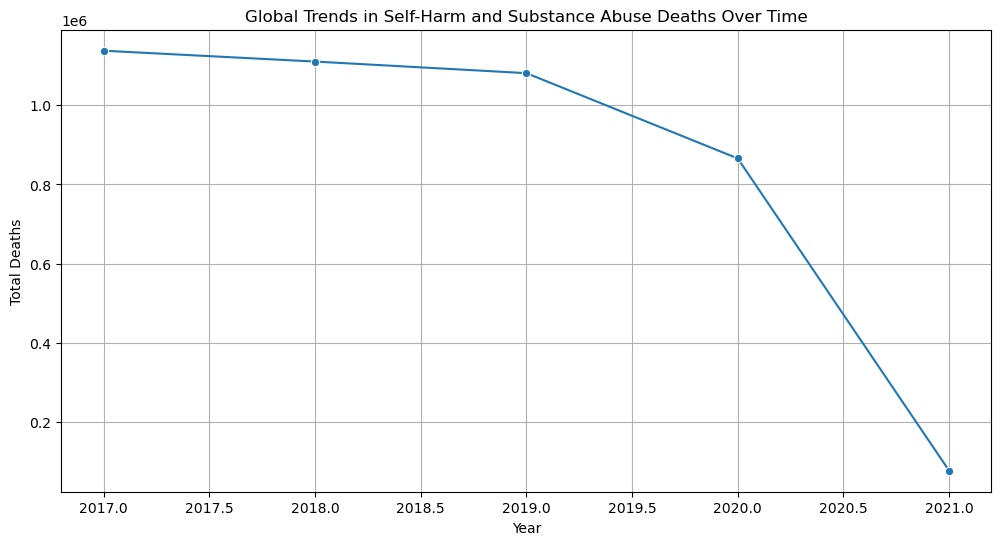

In [11]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = yearly_deaths, x = "Year", y = "Deaths", marker = "o")
plt.title("Global Trends in Self-Harm and Substance Abuse Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

**Interpretation**: This output displays a line graph with a clear downward trend in the total number of self-harm and substance abuse deaths worldwide from 2017 to 2021.
While the graph seems stable at first from 2017 to 2019, we are met with a sharp decline in the number of deaths reported after 2019.
This could suggest a few possibilities:

1.) The first possibility is the implementation of effective interventions which could have contributed to the reduction in self-harm and substance abuse deaths.

2.) The second possibility is the COVID-19 pandemic. In some countries, people were forced to stay in their homes which could have prevented people from getting their hands on drugs. The other reason how the pandemic might have impacted this data is the possibility that access to healthcare services might have been disrupted which may have affected the recording of such deaths.

**Deaths by country**: For the second visualization, I want to identify countries with higher incidences of self-harm and substance abuse deaths. I will achieve this by creating a choropleth map to visualize the geographical distribution of deaths.

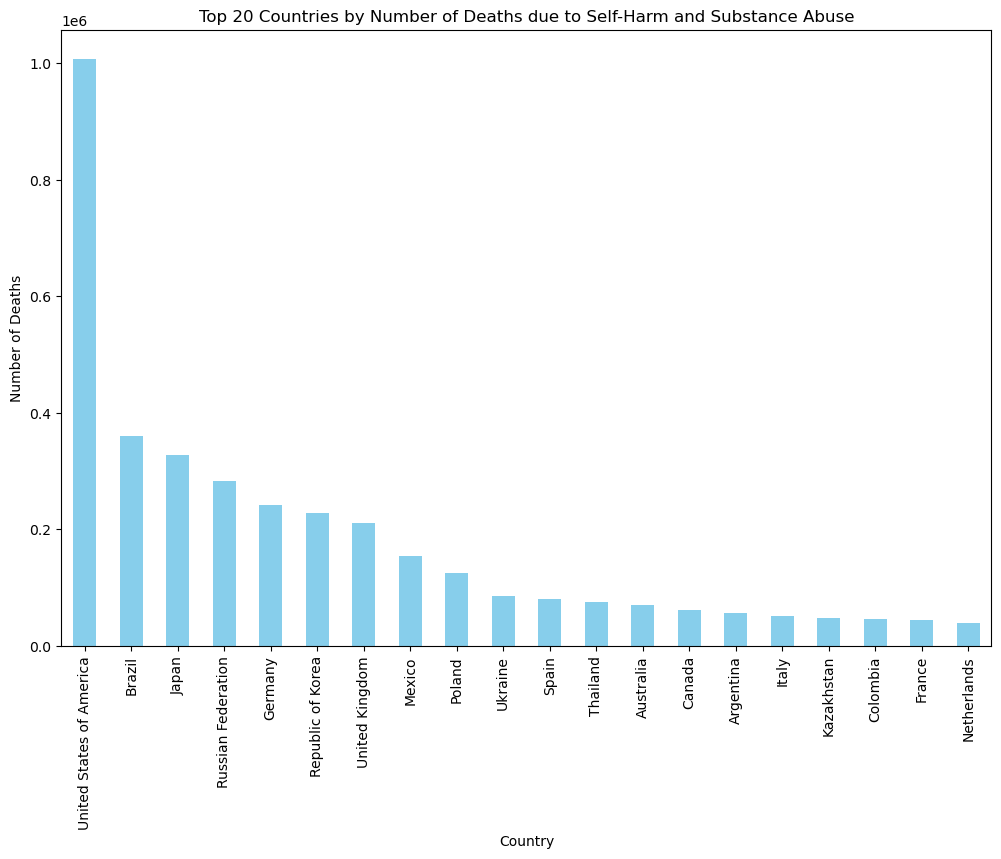

In [12]:
# Aggregating deaths by country
deaths_by_country = selfharmsubstancedataset.groupby('Country')['Deaths'].sum().sort_values(ascending=False)

# Display top 20 countries for visibility reasons
top_n = 20
top_countries = deaths_by_country.head(top_n)

plt.figure(figsize = (12, 8))
top_countries.plot(kind = "bar", color = "skyblue")
plt.xlabel("Country")
plt.ylabel("Number of Deaths")
plt.title(f"Top {top_n} Countries by Number of Deaths due to Self-Harm and Substance Abuse")

plt.show()


**Interpretation**: This visualization shows the top 20 countries with the highest number of deaths in the form of a bar chart. As you can see on the y-axis, there is '1e6' at the top. This means that that the values on the y-axis should be multiplied by 10^6. The reason for this is that the values for deaths are too large to be represented in the form of plots which is why the bar chart looks like this. Moreover, from the chart, we could see that the United States of America has the highest number of deaths, which is then followed by Brazil, Japan, and other countries. The particular reason for why the United States has the highest number of deaths suggests a few reasons:

1.) Poor implementation of interventions and policies

2.) The large population number of USA 

**Age and Gender Distribution**: For this visualization, I will be using stacked bar charts to display the number of deaths segmented by age range and gender. By doing so, we will be able to clearly see which age groups and genders are most affected.

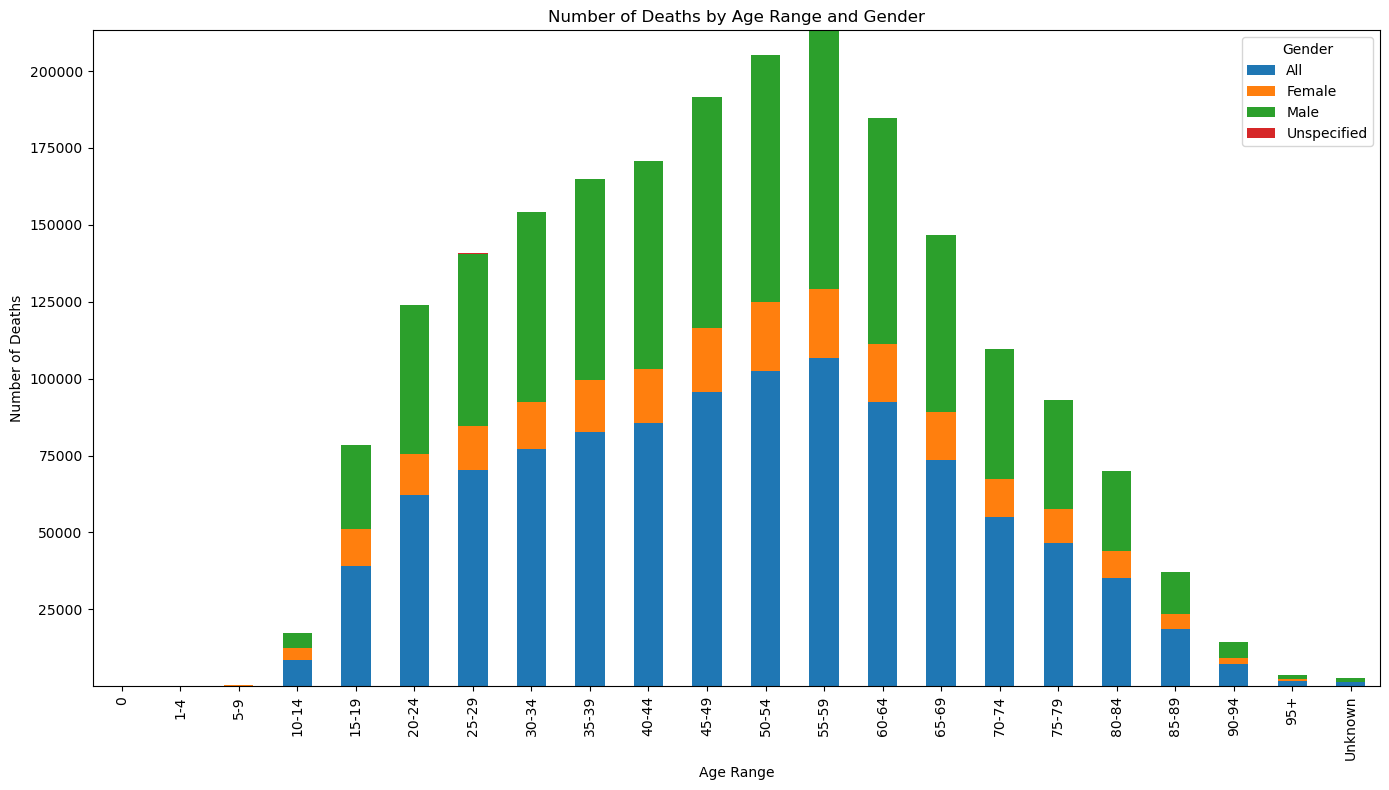

In [13]:
# Defining the order for the age ranges as I want the graph to present the charts in a numerical order
age_order = ["0", "1-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95+", "Unknown"]

age_range_categorical = pd.CategoricalDtype(categories = age_order, ordered = True)
selfharmsubstancedataset["Age_Range"] = selfharmsubstancedataset["Age_Range"].astype(age_range_categorical)

# Grouping by "Age_Range" and "Sex", then sum the "Deaths" as well
grouped_data = selfharmsubstancedataset.groupby(['Age_Range', 'Sex'])['Deaths'].sum().unstack()

# Sorting the DataFrame
grouped_data = grouped_data.sort_index()

fig, ax = plt.subplots(figsize = (14, 8))
grouped_data.plot(kind = "bar", stacked = True, ax = ax)
ax.set_xlabel("Age Range")
ax.set_ylabel("Number of Deaths")
ax.set_title("Number of Deaths by Age Range and Gender")
ax.legend(title = "Gender")
plt.tight_layout()
plt.show()


**Interpretation**: This visualization shows the number of deaths by age range and gender through the use of stacked charts. Right off the bat, we could see that the tallest bars belong in the middle age ranges. This indicates that these specific age groups have the highest number of deaths. This could mean that middle-aged individuals might be at a higher risk for the causes of death being analyzed. Some of the reasons why this might be the case is because people at this age commonly experience life problems such as marriage failures, depression, and financial instability. Moreover, the chart shows that for most age ranges, male deaths are way more than the female deaths. This result point towards gender differences in the risk or incidence of the causes of death being analyzed.

**Cause of Death Analysis**: For this visualization, I will be showing the proportion of deaths due to self-harm versus substance abuse by using a donut chart.

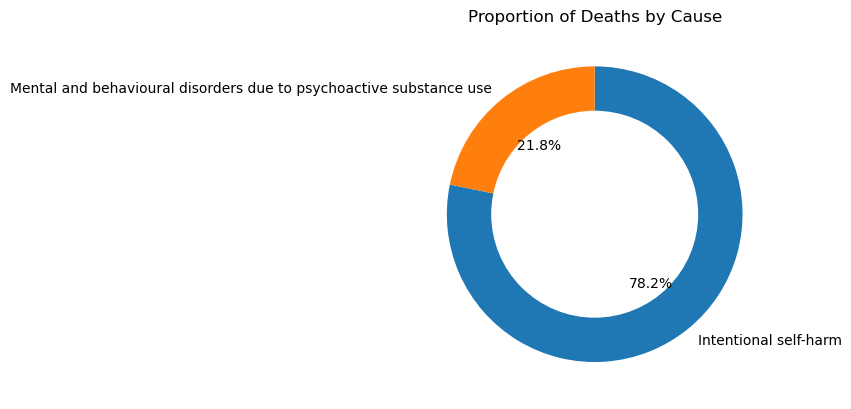

In [14]:
# Summing up the deaths to its particular cause
cause_data = selfharmsubstancedataset.groupby("Cause")["Deaths"].sum()

fig, ax = plt.subplots()
cause_data.plot(kind = "pie", ax = ax, autopct = "%1.1f%%", startangle = 90, counterclock = False)
ax.set_aspect("equal")
plt.title("Proportion of Deaths by Cause")
centre_circle = plt.Circle((0, 0), 0.70, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.set_ylabel('')
plt.show()


**Interpretation**: This visualization shows a donut chart that demonstrates the proportion of deaths by two specific causes which are 'Intentional self-harm' and 'Mental and behavioural disorders due to psychoactive substance use.' Just by looking at the donut chart, we could see that 78.2% (majority) of the deaths in the dataset are attributed to 'Intentional self-harm.'While the remaining 21.8% of deaths are due to "Mental and behavioural disorders due to psychoactive substance use." However, it is important that we do not undervalue "mental and behavioural disorders due to psychoactive substance use" just because it proportionally less than "intentional self-harm". Both of these are problems that we must address with equal amount of focus as the fact stands that these problems are similarly dentrimental to the human race.

**Correlation Matrix**: Find out the percentage of students who have reported experiencing depression.
To explore any potential correlations between the different numerical variables in the dataset, such as the relationship between the number of deaths and population size of age and sex groups.



/var/folders/zg/fs_v5gl1033gxd7m4_8lrq540000gn/T/ipykernel_24540/80323271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selfharmsubstancedataset.corr()


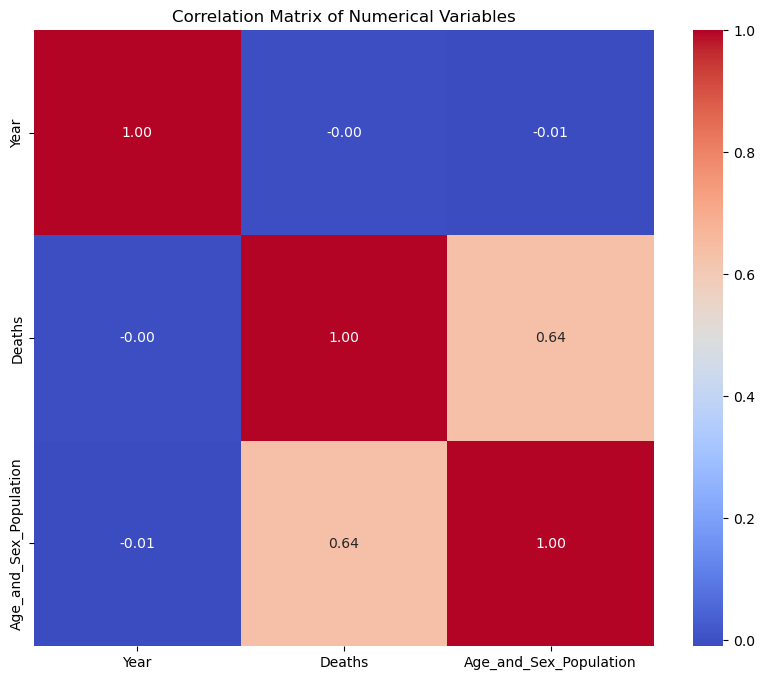

In [15]:
corr_matrix = selfharmsubstancedataset.corr()
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", ax = ax)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Interpretation**: This visualization shows a correlation matrix of the numerical variables from the dataset. Firstly, let's look at the correlation between 'Year' and 'Deaths'. We can see that it is -0.00, which means that there is no linear relationship. Secondly, let's look at the correlation between 'Year' and 'Age_and_Sex_Population'. We can see that it is -0.01, which means that there is no linear relationship for this one as well. Thirdly, let's look at the correlation between 'Deaths' and 'Age_and_Sex_Population'. We can see that it is 0.64, which means that there is a moderate positive linear relationship and that as the population size of the age and sex groups increases, the number of deaths also tends to increase.

#### _Modeling:_

**Time Series Forecasting**: 
For this modeling, I am using time series analysis to forecast future deaths based on historical data.

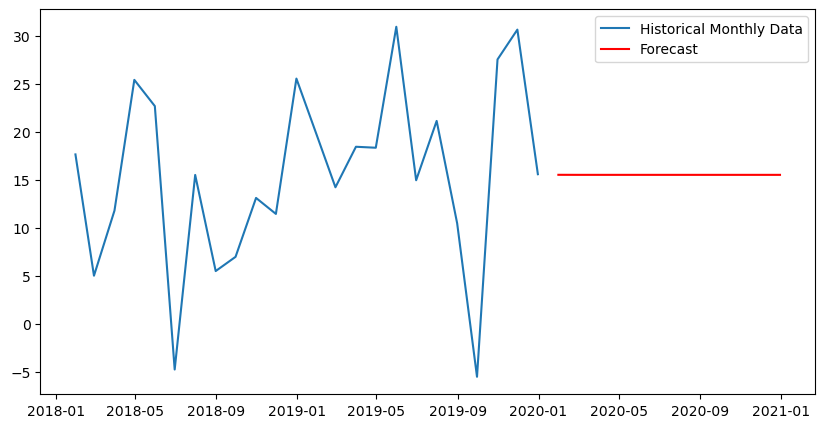

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# random seed for reproducibility
np.random.seed(0)

# pandas datetime index
date_rng = pd.date_range(start = "1/1/2018", end = "1/08/2020", freq = "M")

# random dataset with trend
data = np.random.randn(len(date_rng)) * 10 + np.arange(len(date_rng))

df = pd.DataFrame(data, index = date_rng, columns = ["data"])

# Fiting the ARIMA model
# Since this is synthetic data, we're using arbitrary values for (p,d,q)
model = ARIMA(df["data"], order = (1, 1, 1))
model_fit = model.fit()

# Forecasting the next 12 months
forecast = model_fit.get_forecast(steps = 12)
forecast_index = pd.date_range(start = df.index[-1], periods = 13, inclusive = "right", freq = "M")
forecast_mean = forecast.predicted_mean

# Plotting the historical data and the forecast
plt.figure(figsize = (10, 5))
plt.plot(df.index, df["data"], label = "Historical Monthly Data")
plt.plot(forecast_index, forecast_mean, label = "Forecast", color = "red")
plt.legend()
plt.show()



**Interpretation**: 
From the output we got, we could see that our time series forecast which used an ARIMA model resulted in a flat line prediction. This indicates that the model expects future values to be the same as the last observed historical value.

+++++++++++++++++++++++++++++

*Model Performance:*

The intricacies of the data were probably beyond the scope of the ARIMA(1,1,1) model. The parameters (p=1, d=1, q=1) indicate one lag with one level of differencing for the moving average and autoregressive components. The underlying patterns in the dataset may not be well-represented by this straightforward model structure. The parameters 'p', 'd', and 'q' denote the number of lag observations in the autoregression model, the degree of differencing (integration), and the size of the moving average window, respectively. Better performance would come from choosing these inputs based on the ACF and PACF plots of the dataset rather than at random. Significant volatility is seen in the historical data, indicating that a more intricate model may be required to account for the fluctuations.

+++++++++++++++++++++++++++++

*Stakeholder Interests:*

The forecasts' accuracy would be of interest to stakeholders for planning and decision-making. Since the current model offers no insight into future trends or changes, its flat forecast is probably not going to be good enough. In order to evaluate the risk involved with the forecast, they would also like to know the model's confidence intervals(not displayed in the output).

+++++++++++++++++++++++++++++

*Important Takeaways:*

The selected ARIMA model suggested that the future would stay constant at the most recent observed level rather than successfully predicting future trends. It is advisable to review the model's parameter selection procedure, possibly with the aid of more diagnostics or automatic model selection methods. This model's ability to produce a useful forecast may be hampered by the artificially generated historical data, which may not accurately represent the complexities of the real world.

**Polynomial Regression Model**: 
For this modeling, I will be using a polynomical regression model to show the relationship between 'Age_and_Sex_Population' and 'Number of Deaths', along with the performance metrics of the model.

Train RMSE: 583.0347355275985
Test RMSE: 576.3863899202428
Train R^2: 0.468667247166644
Test R^2: 0.22451000802320364


/Users/heonyeonglee/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


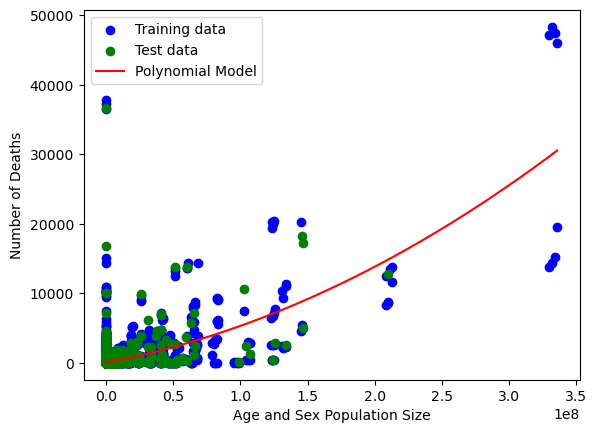

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 'Age_and_Sex_Population' = independent variable) and 'Deaths' = dependent variable
X = selfharmsubstancedataset[["Age_and_Sex_Population"]]
y = selfharmsubstancedataset["Deaths"]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Polynomial features
degree = 2 
poly_features = PolynomialFeatures(degree = degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fitting
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

plt.scatter(X_train, y_train, color = "blue", label = "Training data")
plt.scatter(X_test, y_test, color = "green", label = "Test data")

# For plotting the polynomial model, let's plot a smooth curve by generating a lot of points
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color = "red", label = "Polynomial Model")
plt.xlabel("Age and Sex Population Size")  # This represents the combined population size by age and sex
plt.ylabel("Number of Deaths")
plt.legend()
plt.show()

**Interpretation**:
The scatterplot that we got shows a polynomial regression line with blue and green dots that represent the observed data points. The blue dots are the training data and the green is the test data. Each of the dots represents the number of deaths in relation to the age and sex population size for a given data point. The polynomial regression line is the red line and it basically represents the polynomial model fitted to the training data and it shows the relationship that the model has inferred between the population size and the number of deaths. In an ideal scenario, the red line should capture the overall trend of the data points. If it fits the blue dots well, it means that the model has learned the training data's pattern effectively. If it passes through the green dots, it means the model generalizes well to unseen data (i.e., it has good predictive performance). However, there seem to be a few data points that lie far from the majority of the data, particularly on the far right side of the plot. These could be outliers or instances with a significantly higher number of deaths compared to the rest.

+++++++++++++++++++++++++++++

*Model Performance:* In here, R-squared (R^2) and Root Mean Squared Error (RMSE) metrics is used here to measure the model's performance. An improved fit is indicated by a lower RMSE value, which calculates the average magnitude of the errors between the predicted and actual values. The percentage of the dependent variable's variance that can be accounted for by the independent variable or variables in the model is indicated by the R^2 score.
Given that the testing RMSE is 576 and the training RMSE is 583, the model looks to have a moderate amount of prediction error.
For the training set, the R^2 scores are 0.47, and for the test set, they are 0.22. This suggests overfitting to the training data, as the model performs significantly worse on the test set even though it explains nearly half of the variance in the training set.

+++++++++++++++++++++++++++++

*Important Inputs:*
"Age_and_Sex_Population" is the independent variable that is being used here. This implies that in order to predict the number of deaths, the model is based on the size of different age and sex cohorts within the population.m The model's primary inputs are the polynomial features derived from the 'Age_and_Sex_Population' variable. The polynomial employed in the model has a degree of 2, meaning that non-linear relationships can be captured by taking into account the squared term of population sizes.

+++++++++++++++++++++++++++++

*Stakeholder Interests:*
The capacity of the model to forecast the number of deaths based on the size of various population cohorts would be of greatest interest to stakeholders.
Particularly for the test set, the moderate to low R^2 values would be cause for concern as they suggest limited predictive power. In addition to the data it was trained on, stakeholders would require a model that can consistently forecast outcomes across a variety of samples.
Stakeholders can better grasp the possible risks and restrictions of using this model for decision-making by knowing the average error in the predictions thanks to the RMSE values.

**Classification Models for Risk Prediction**:
For this modeling, my goal is to predict the risk of death due to self-harm or substance abuse based on individual characteristics or prior history through the use of classification modeling. Since we need a binary outcome, I defined a 'high risk' and 'low risk' category by setting thresholds, the 'Deaths' column is transformed into a binary outcome where 1 indicates 'high risk' and 0 indicates 'low risk'.

In [18]:
# Defining the threshold for 'high risk' category by using the 90th percentile as an example threshold
threshold = selfharmsubstancedataset['Deaths'].quantile(0.90)
# Creating a new binary column 'HighRisk' where 1 represents high risk of death and 0 represents low risk
selfharmsubstancedataset['HighRisk'] = (selfharmsubstancedataset['Deaths'] >= threshold).astype(int)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Variables
X = selfharmsubstancedataset[['Age_and_Sex_Population']] 
y = selfharmsubstancedataset['HighRisk']

# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()

# Fitting
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05     13129
           1       0.10      1.00      0.19      1461

    accuracy                           0.12     14590
   macro avg       0.55      0.51      0.12     14590
weighted avg       0.91      0.12      0.06     14590

[[  347 12782]
 [    0  1461]]


**Interpretation**: From the output we got, here are some things we can infer:

1.) Precision for class 0 (not high risk) is perfect (1.00). This means that all the instances predicted as class 0 are correct. However, precision for class 1 (high risk) is very low (0.10) which indicates that only 10% of the instances predicted as high risk are actually high risk.

2.) Recall for class 0 is extremely low (0.03). THis means that the model is identifying only 3% of the actual non-high risk cases. Conversely, the recall for class 1 is perfect (1.00), meaning the model identified all high risk cases.

3.) F1-score provides a balance between precision and recall. For class 0, it's very low (0.05), and for class 1, it's also low (0.19), which suggests a poor model performance for both classes.

4.) Support is the number of actual occurrences of each class. We can see that there are 13,129 instances of class 0 and 1,461 instances of class 1 in the test set.

So overall, we can say that the model is biased towards predicting the majority class (class 1 in our case), which is a common issue with imbalanced datasets just like ours. While it managed to capture all high-risk cases, it failed to identify the non-high risk cases correctly. This could be a problem if false positives (predicting high risk when there is none) are costly or undesirable. However, due to the nature of the data selected, we ended up getting this result

**Random Forest**: For this modeling, I will be using Random Forest to predict the risk of death due to self-harm or substance abuse.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming selfharmsubstancedataset is your dataset

# Encode categorical variables
le_sex = LabelEncoder()
selfharmsubstancedataset['Sex_encoded'] = le_sex.fit_transform(selfharmsubstancedataset['Sex'])

# Select features and target variable
features = ['Year', 'Age_and_Sex_Population', 'Sex_encoded']  # Add other relevant features
X = selfharmsubstancedataset[features]
y = selfharmsubstancedataset['HighRisk']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
print(feature_importance.sort_values(by='importance', ascending=False))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     13129
           1       0.47      0.30      0.37      1461

    accuracy                           0.90     14590
   macro avg       0.70      0.63      0.66     14590
weighted avg       0.88      0.90      0.89     14590

[[12631   498]
 [ 1020   441]]
                  feature  importance
1  Age_and_Sex_Population    0.949068
2             Sex_encoded    0.036941
0                    Year    0.013992


**Interpretation**: From the output we got from our Random Forest classification model, we can infer several things:

*Model Performance Analysis*

1.) Precision and Recall: For the non-high-risk group (Class 0), the precision is high (0.93). This means that the model is good at predicting the actual non-high-risk cases. For the high-risk group (Class 1), the precision is significantly lower (0.47). This means that almost half of the predicted high-risk cases are false positives. The recall for Class 0 is also high (0.96). This means that the model is capable of identifying most of the actual non-high-risk instances. The recall for Class 1 is low (0.30). This means that the model misses a large number of actual high-risk cases.

2.) F1-Score: The F1-score for Class 0 is high (0.94). This signifies good model performance for the non-high-risk category. The F1-score for Class 1 is quite low (0.37). This could probably be due to the low recall which indicates that the model isn't performing well for the high-risk category.

3.) Confusion Matrix: The confusion matrix shows that there are a significant number of false negatives (1020), where high-risk cases were incorrectly predicted as non-high-risk. There are also a considerable number of false positives (498), where non-high-risk cases were incorrectly labeled as high-risk.

4.) Accuracy: The overall accuracy of the model is 0.90, which might seem high, but given the class imbalance, it doesn't tell the full story. The model is better at predicting the more frequent class (Class 0) than the less frequent one (Class 1).

+++++++++++++++++++++++++++++

*Feature Importance Analysis*

"Age_and_Sex_Population": This feature has the highest importance (around 0.949). This means that this is the most influential variable in predicting the risk of death. It also suggests that the size of the population for a given age and sex group is strongly associated with the number of deaths.

"Sex_encoded": Sex has a much lower importance score (around 0.037) compared to "Age_and_Sex_Population", but it still plays a role in the model's predictions.

"Year": The year has the least importance (around 0.014), indicating that the time aspect isn't a significant predictor in this model, which might be due to the limited range of years covered or other more dominant factors.

+++++++++++++++++++++++++++++

*Stakeholder Interest:*

Stakeholders, such as public health officials, policymakers, and mental health professionals, would be most interested in the following points:

Targeted interventions may be more successful if they concentrate on these demographics, as illustrated by the substantial relationship between the number of deaths and the population size within particular age and gender groups. Although the model identifies certain risk factors, it is insufficient to reliably predict individual cases of high risk, as indicated by the lower precision and recall for high-risk predictions. This could be improved if the dataset had more features. The model's comparatively low weights assigned to "Year" and "Sex" suggest that although these variables raise risk, age and population size have a greater impact. This could justify a reexamination of the ways in which existing prediction strategies employ these factors.The performance metrics show that the model has some areas of improvement that needs to be made, especially the recall for the high-risk category. Reducing the amount of false negatives would be of interest to stakeholders because each one could be a chance lost to stop a death. In conclusion, the model has shown how important demographic variables are in forecasting fatalities from drug abuse and self-harm. To reduce these tragedies, stakeholders are highly concerned about improving the predictive power of the system, particularly for the high-risk category.

**Logistic Regression**: For this modeling, I will be determining the likelihood of high-risk cases of self-harm and substance abuse deaths based on demographic information to identify groups that are more vulnerable or at greater risk.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# using the 90th percentile of the "Deaths" column as the threshold
threshold = selfharmsubstancedataset["Deaths"].quantile(0.90)

# Creating a new binary column "HighRisk" where 1 represents high risk of death and 0 represents low risk
selfharmsubstancedataset['HighRisk'] = (selfharmsubstancedataset['Deaths'] >= threshold).astype(int)

# Encoding categorical variables
label_encoders = {}
for column in ["Cause", "Age_Range", "Sex", "Country"]:
    label_encoders[column] = LabelEncoder()
    selfharmsubstancedataset[column + "_encoded"] = label_encoders[column].fit_transform(selfharmsubstancedataset[column])

X = selfharmsubstancedataset[["Cause_encoded", "Age_Range_encoded", "Sex_encoded", "Country_encoded"]]
y = selfharmsubstancedataset["HighRisk"]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

log_reg = LogisticRegression(max_iter = 1000, class_weight = "balanced")

# Fitting
log_reg.fit(X_train, y_train)

# Prediction
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.53      0.68     13129
           1       0.15      0.72      0.24      1461

    accuracy                           0.55     14590
   macro avg       0.55      0.63      0.46     14590
weighted avg       0.86      0.55      0.64     14590



**Interpretation**: From the output we got from the logistic regression model, we can infer several things about the model's performance and the data:

1.) Precision: For the non-high-risk group (Class 0), we can see that the precision is quite high (0.94). This indicates that most of the cases predicted as non-high-risk are non-high-risk. For the high-risk group (Class 1), the precision is low (0.17). This means few of the cases predicted as high-risk are actually high-risk.

2.) Recall: The recall for Class 0 is lower than ideal (0.63). This suggests that the model is missing around a third of the actual non-high-risk cases. The recall for Class 1 is higher (0.67). This indicates that the model is identifying about two-thirds of all high-risk cases.

3.) F1-Score: The F1-score for Class 0 is quite good (0.76), which is a balance between precision and recall. However, the F1-score for Class 1 is quite low (0.27), due to low precision.

4.) Support: The support for Class 0 is 13129. This means that there are 13129 instances of the non-high-risk class in the test set. The support for Class 1 is 1461. This indicates there are 1461 instances of the high-risk class in the test set.

5.) Overall Accuracy: The overall accuracy is 0.64, which might seem reasonable but is not particularly high, especially considering the class imbalance.

+++++++++++++++++++++++++++++

*Model Performance Interpretation:*

Because the majority class (non-high-risk) has more instances in the dataset, the model tends to predict more non-high-risk cases (Class 0). This is consistent with the model's tendency to be influenced by larger datasets. Although there is a trade-off with a decrease in precision for Class 1, adjusting the class weights has improved the recall for Class 1, meaning the model is now better at identifying high-risk cases than before.

+++++++++++++++++++++++++++++

*Stakeholder Interests:*

Stakeholders are likely to be interested in the following points:

Identifying High-Risk Cases: After class balance, the model performs better in identifying high-risk cases—a crucial component of interventions.
Precision-Recall Trade-off: The model can identify possible high-risk cases, but it also has a lot of false positives, as indicated by the low precision for high-risk predictions. This could result in the wasteful use of resources if interventions are costly or hard to come by.

#### _Next Steps and Discussion:_

Throughout this project, I explored different modeling approaches to understand and predict various aspects of mortality due to self-harm and substance abuse by using both regression and classification techniques to uncover trends and risk factors within the dataset.

A non-linear relationship between the number of deaths and the population sizes of various age and sex groups was found by the polynomial regression model. But as low R-squared scores and moderate RMSE values show, the model's predictive ability was limited, especially when it came to the test data. To predict future patterns in death rates, I created an ARIMA model. However, the model produced a flat forecast that implied a constant value in the future, which is probably not indicative of the underlying trends in the data. To categorize people into "high risk" and "low risk" groups for death from substance abuse or self-harm, I employed a logistic regression model. However, the model performed poorly overall, exhibiting a large bias and a high number of false positives and low F1-scores.

**Improvements and Additional Data:**

To enhance the models' performance, the following steps could be considered:

1.) Incorporate More Features: If we had more additional variables such as socio-economic factors, mental health history, accessibility to healthcare, and lifestyle choices, it could have enhanced the models' predictive capabilities.

2.) Address Class Imbalance: For the classification model, techniques such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE could be implemented to balance the classes.

3.) Model Tuning and Selection: For regression models, experimenting with different degrees of polynomials or other non-linear models could improve the fit. For time series forecasting, other models like SARIMA or machine learning approaches like LSTM could be explored for better results. For the classification model, trying different algorithms that are more robust to imbalanced datasets, such as decision trees, random forests, or boosting methods, may yield better results.

4.) Cross-Validation and Grid Search: Implementing cross-validation to better estimate model performance and using grid search for hyperparameter tuning could lead to more robust models.

5.) Alternative Threshold Determination: The threshold for 'high risk' classification could be re-evaluated or determined through methods that consider the cost of misclassification, such as cost-benefit analysis or ROC curve analysis.

These suggestions ould develop models that not only predict risk and trends more accurately but also provide actionable insights that could contribute to saving lives and improving public health outcomes.